# Implementasi Algoritma K-Nearest Neighbor Untuk Diagnosis Pasien Kanker Payudara
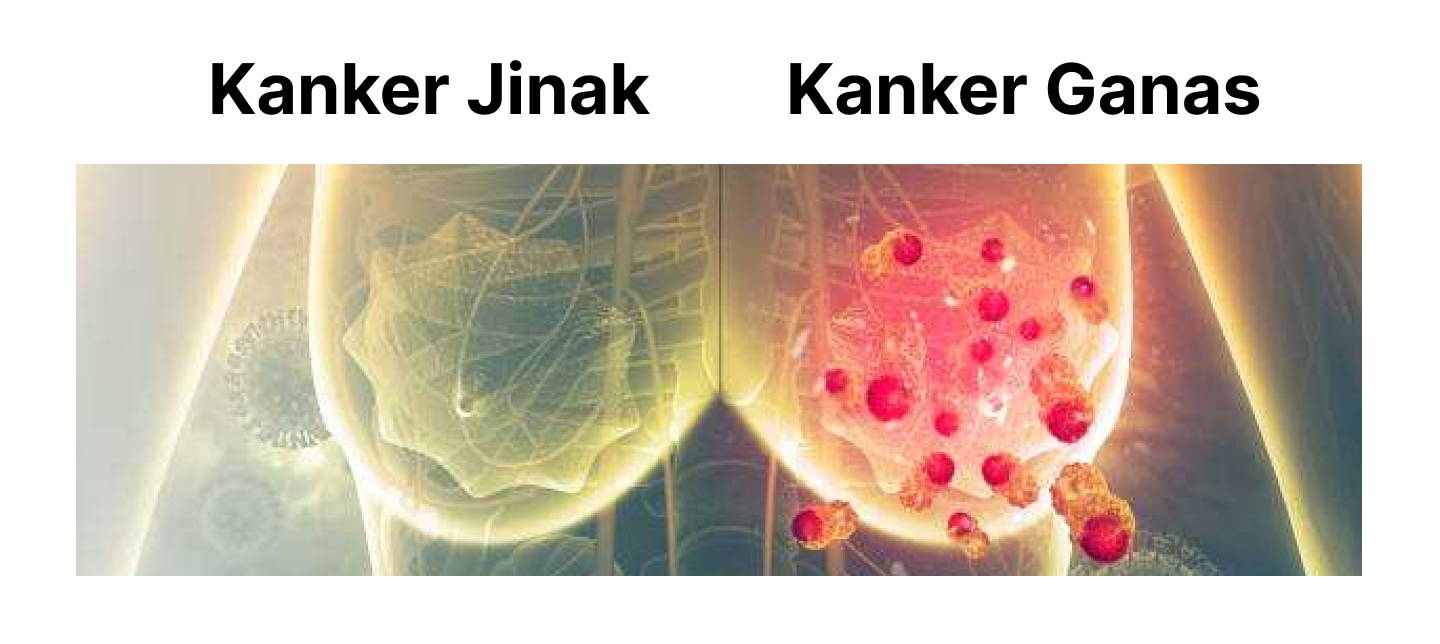

## Kelompok 6 - Manajemen Proyek

#### Anggota Kelompok:
- 203200102 / Inayah Khasna Putri Afifah **(Project Manager)**
- 203200140 / Salis Nizar Qomaruzaman **(Data Scientist)**
- 203200094 / Afifah Indrawati **(Machine Learning Engineer)**
- 203200128 / Muhamad Hafidudin **(Software Engineer)**

#### Dataset :
- Nama dataset : `Breast Cancer Wisconsin` (Diagnostic) Data Set
- Link sumber dataset : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv

---------------------------

##A. Latar Belakang
**Oleh: Inayah Khasna Putri Afifah (Project Manajer)**

"Penggunaan sistem pendukung keputusan menggunakan algoritma K-Nearest Neighbor (KNN) dalam diagnosis kanker payudara".

Kanker payudara merupakan penyakit yang sering terjadi pada wanita dan setiap tahunya jutaan kasus baru terjadi sampai menyebabkan ribuan kematian didunia.
Pengobatan yang tepat memerlukan pengetahuan tentang jenis kanker, apakah ganas atau jinak. Ini membantu dokter merencanakan perawatan yang sesuai untuk pasien.



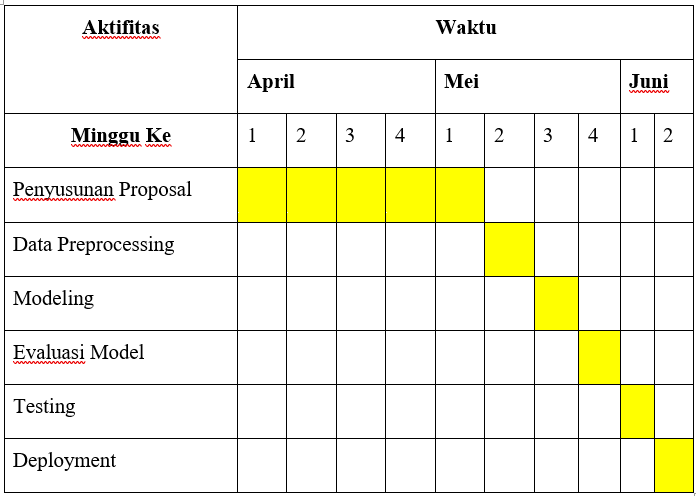

## 1. Data Preprocessing
**Oleh: Salis Nizar Qomaruzaman (Data Scientist)**

In [ ]:
# CONNECT TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 1.1 Import library Python yang dibutuhkan

In [ ]:
import numpy as np #Transformasi data numerik
import pandas as pd #Membaca, manipulasi, dan menganalisis data
import matplotlib.pyplot as plt #Visualisasi Data
import seaborn as sns #Visualisasi data tingkat tinggi

from matplotlib import rcParams #Mengatur dan mengkonfigurasi plot.
from matplotlib.cm import rainbow #Memberikan skala warna spektrum pelangi pada plot.
from sklearn.preprocessing import StandardScaler #Standarisasi data.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/data.csv') #Membaca Data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Menghapus kolom `id`, dan `Unnamed: 32` pada DataFrame (df) dan mengubah nilai pada kolom `diagnosis` dari `(M)aligna` menjadi `1` dan `(B)enigna` menjadi `0` atau mentransformasi tipe data `string` (huruf) ke tipe data `integer` (angka) agar bisa dibaca oleh mesin

In [ ]:
total_nul_values = sum(df.isnull().sum())
print(total_nul_values)

0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


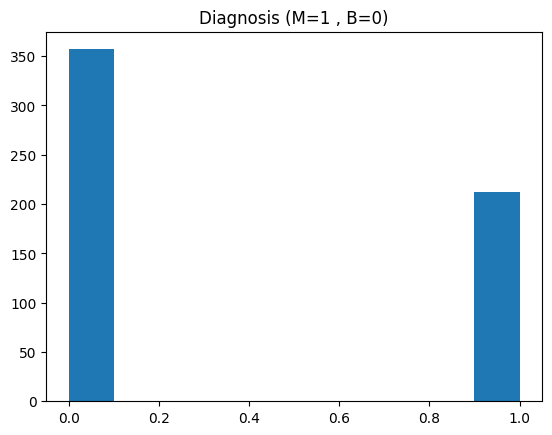

In [ ]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [ ]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


mengelompokkan DataFrame `df` berdasarkan kolom `diagnosis` dan menghitung rata-rata untuk setiap kolom numerik dalam setiap kelompok.

In [ ]:
print(df['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


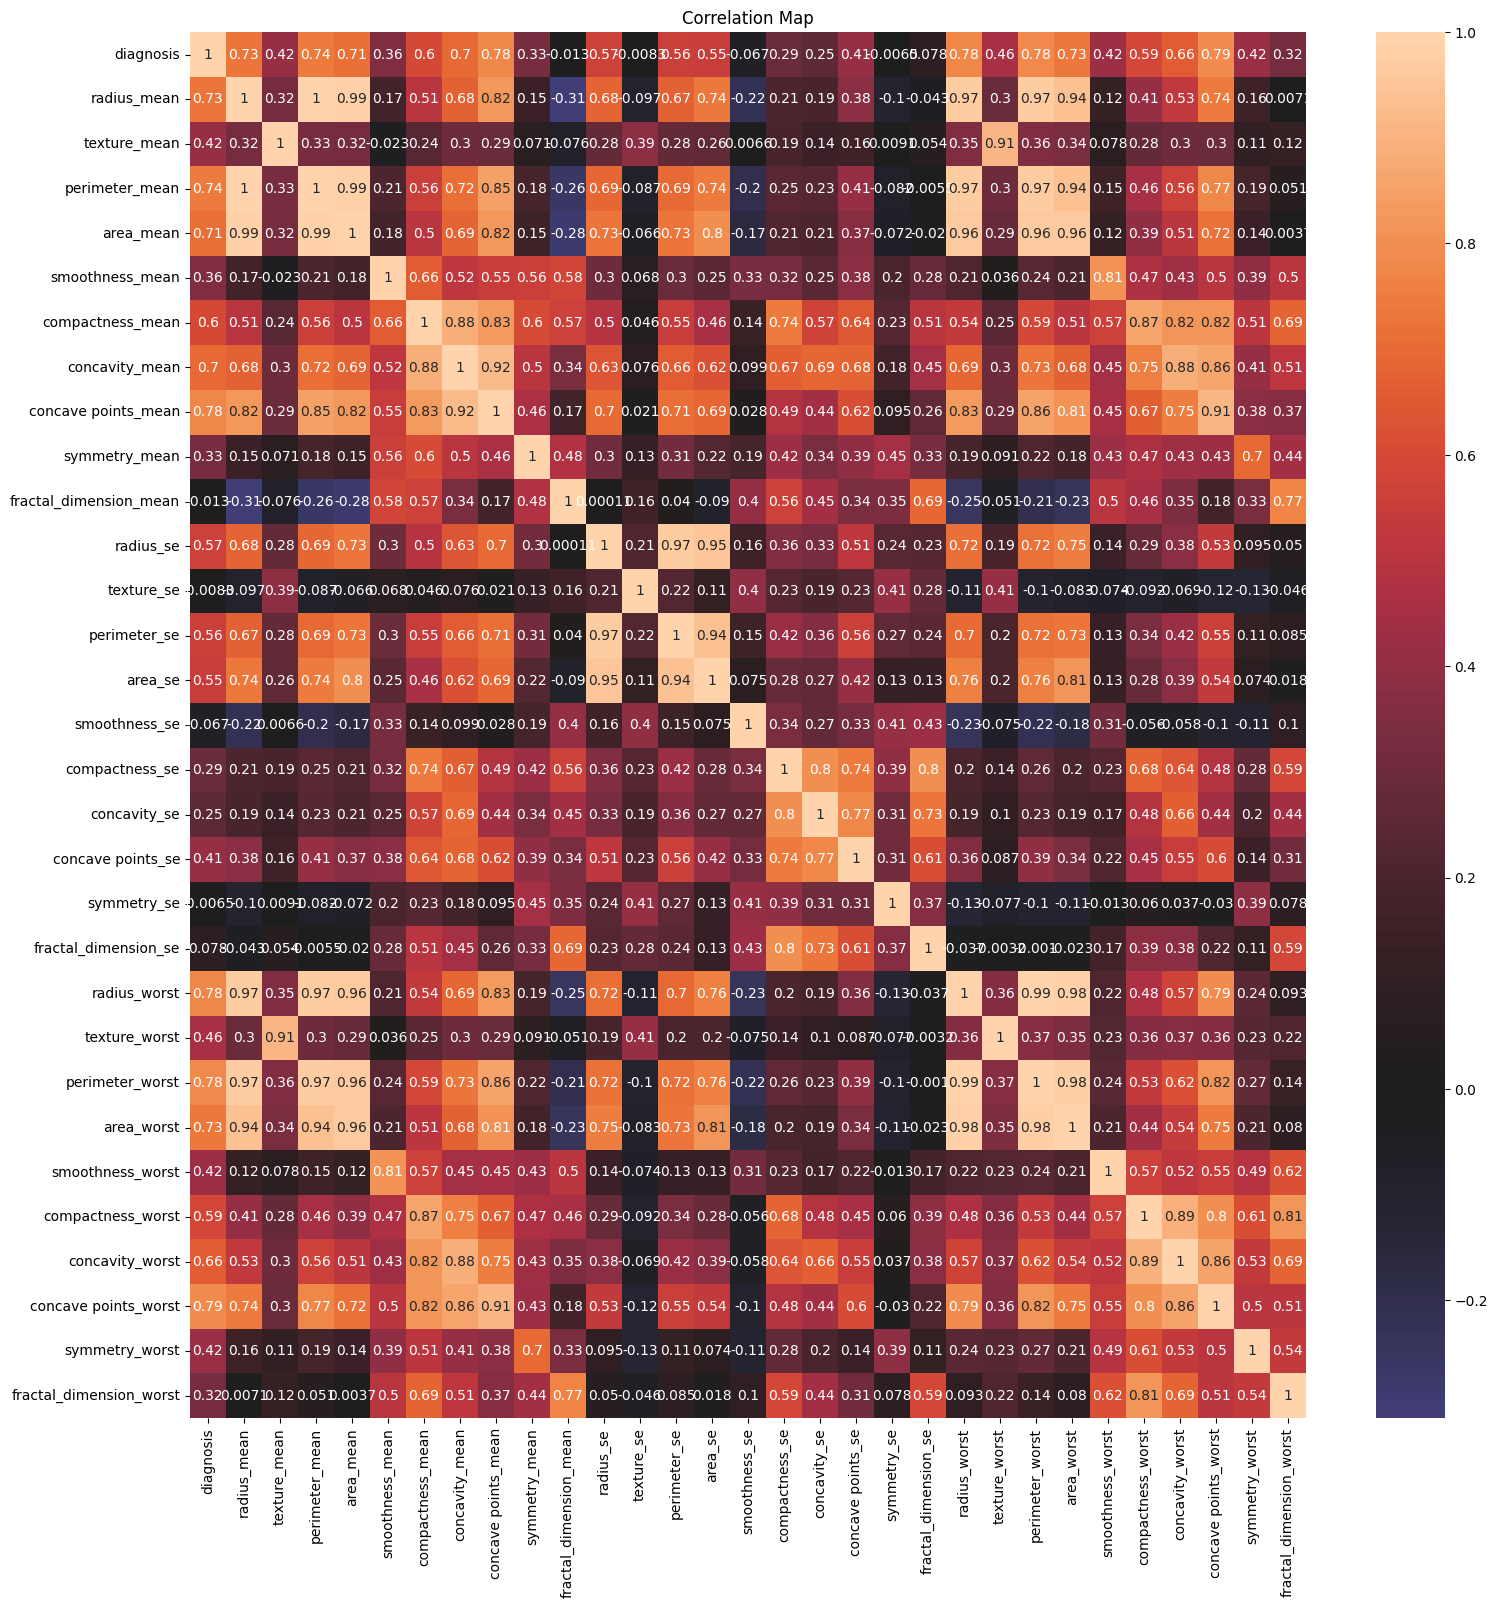

In [ ]:
# To get accurate data visualization remove multi colinearity it means remove the duplicate columns
# Check the correlation between features
# Analysis only for features_mean
# Visualize correlations by heatmap

plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show()

In [ ]:
X=df.drop('diagnosis', axis=1,inplace=False)

y=df['diagnosis']

Memisahkan data `X(atribut)` dengan data `y(target)`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Membagi data `test 30%` dan data `train 70%`

## 2. Modeling, Evaluasi Model, dan Prediksi
**Oleh: Afifah Indrawati (Machine Learning Engineer)**

Modeling adalah proses membangun model yang dapat digunakan untuk melakukan prediksi pada data baru .Dalam kasus ini, algoritma K-Nearest Neighbors (KNN) digunakan sebagai metode pemodelan.



Pada baris kedua, `knn = KNeighborsClassifier(n_neighbors = 5)` membuat objek knn yang merupakan sebuah instance (contoh) dari kelas `KNeighborsClassifier`. Di sini, kita menentukan parameter `n_neighbors` yang diatur menjadi 5. Hal ini berarti ketika KNN digunakan untuk melakukan prediksi, ia akan mempertimbangkan 5 tetangga terdekat dari titik yang akan diprediksi.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.89473684 0.8245614  0.89473684 0.94736842 0.92982456 0.92982456
 0.94736842 0.96491228 0.92982456 0.91071429]


Dalam loop `for`, model KNN dibuat dengan jumlah tetangga ganjil dari 1 hingga 50, dan validasi silang dilakukan pada setiap model menggunakan data latihan. Skor validasi silang rata-rata dari 10 lipatan disimpan untuk setiap model. Setelah loop selesai, validasi silang juga dilakukan pada model KNN terakhir dengan jumlah tetangga terbesar (50). Akhirnya, skor validasi silang pada model terakhir dicetak, memungkinkan kita untuk memilih jumlah tetangga terbaik berdasarkan performa model yang diukur dengan skor validasi silang.

The optimal number of K neighbors = 13


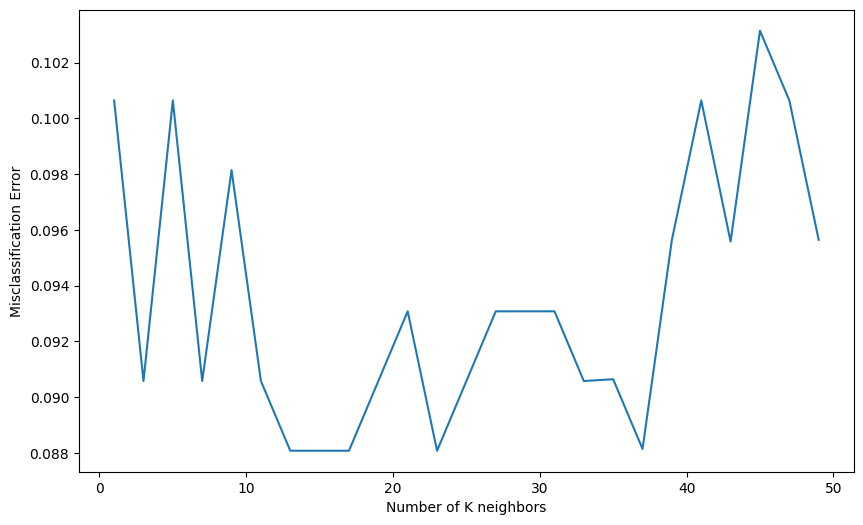

In [ ]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

# Determining the best k value
optimal_k = neighbors [MSE. index (min (MSE))]
print('The optimal number of K neighbors = %d' %optimal_k)

# Plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K neighbors')
plt.ylabel('Misclassification Error')
plt.show()

Kode tersebut menghitung error klasifikasi (MSE) dari skor validasi silang sebelumnya dan menentukan nilai k terbaik berdasarkan MSE terendah. Selanjutnya, kode memplotting grafik error klasifikasi versus nilai k. Dengan demikian, kita dapat melihat perubahan error klasifikasi seiring dengan nilai k pada model KNN dan memilih nilai k terbaik berdasarkan nilai MSE terendah.

In [ ]:
model= KNeighborsClassifier (n_neighbors=13)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Generate the summary of the predictions (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print("Classification Report: \n\n")
print(classification_report (y_test, y_pred))

Classification Report: 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Kode tersebut menggunakan model KNN dengan 13 tetangga untuk melatih dan membuat prediksi pada data uji. Setelah pelatihan, modul `classification_report` digunakan untuk menghasilkan ringkasan evaluasi klasifikasi yang mencakup metrik seperti presisi, recall, f1-score, dan dukungan untuk setiap kelas.

In [ ]:
# Accuracy score of the prediction
from sklearn.metrics import accuracy_score
print('Akurasi prediksi kanker payudara menggunakan KNN  =', accuracy_score (y_pred,y_test)*100)

Akurasi prediksi kanker payudara menggunakan KNN  = 96.49122807017544


Kode tersebut menghitung dan mencetak skor akurasi prediksi kanker payudara menggunakan model KNN. `accuracy_score(y_pred, y_test)*100` digunakan untuk menghitung dan mencetak skor akurasi sebagai persentase.

Text(113.9222222222222, 0.5, 'predicted class')

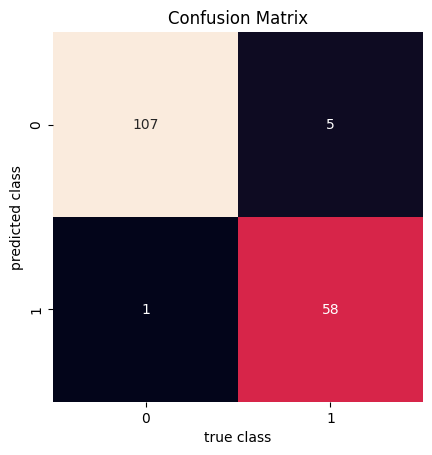

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

In [ ]:
# Simpan dataset baru
new_data = pd.DataFrame([[14.0, 15.2, 102.5, 750.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], columns=X.columns)
new_data.to_csv('/content/drive/My Drive/dataset/new_data.csv', index=False)

Kode tersebut membuat sebuah dataframe baru `new_data` dengan satu baris data numerik. Nilai-nilai tersebut ditentukan secara langsung dalam kode. Selanjutnya, dataframe tersebut disimpan sebagai file CSV dengan nama 'new_data.csv' di lokasi yang ditentukan.

In [ ]:
# Load dataset
new_data = pd.read_csv('/content/drive/My Drive/dataset/new_data.csv')

In [ ]:
# Membuat prediksi dengan model yang telah dilatih
predictions = model.predict(new_data)

# Menampilkan hasil prediksi
print(predictions)

[0]


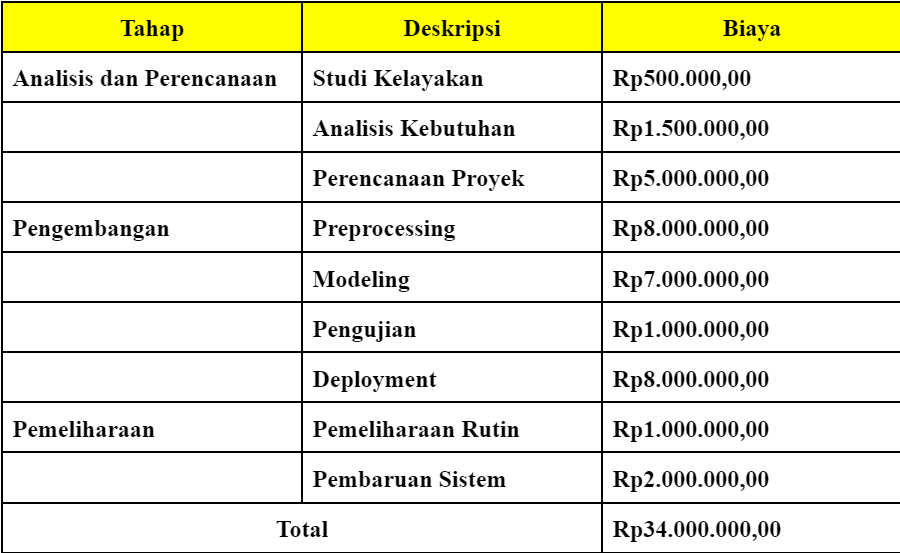

## Penjelasan Dataset secara sederhana

Dataset kanker payudara yang digunakan dalam aplikasi ini memiliki atribut-atribut berikut:

1. radius_mean: Atribut ini mengukur rata-rata jarak dari pusat ke titik-titik pada permukaan tumor. Secara sederhana, atribut ini memberikan informasi tentang ukuran rata-rata tumor.

2. texture_mean: Atribut ini mengukur variasi tekstur pada gambar digital dari aspirasi jarum halus (FNA) tumor. Secara sederhana, atribut ini memberikan informasi tentang variasi tekstur permukaan tumor.

3. perimeter_mean: Atribut ini mengukur rata-rata panjang garis yang membentuk kontur tumor. Secara sederhana, atribut ini memberikan informasi tentang ukuran rata-rata garis tepi tumor.

4. area_mean: Atribut ini mengukur rata-rata luas wilayah yang tercakup oleh tumor. Secara sederhana, atribut ini memberikan informasi tentang ukuran rata-rata wilayah tumor.

5. smoothness_mean: Atribut ini mengukur variasi lokal dalam panjang radius tumor. Secara sederhana, atribut ini memberikan informasi tentang sejauh mana permukaan tumor halus atau kasar.

6. compactness_mean: Atribut ini mengukur perbandingan antara perimeter kuadrat dengan luas nyata tumor. Secara sederhana, atribut ini memberikan informasi tentang seberapa kompak atau berkerut tumor.

7. concavity_mean: Atribut ini mengukur keparahan cekungan pada permukaan tumor. Secara sederhana, atribut ini memberikan informasi tentang seberapa dalam cekungan pada tumor.

8. concave points_mean: Atribut ini mengukur jumlah titik konkaf pada permukaan tumor. Secara sederhana, atribut ini memberikan informasi tentang jumlah dan keparahan konkaf pada tumor.

9. symmetry_mean: Atribut ini mengukur tingkat simetri dari tumor. Secara sederhana, atribut ini memberikan informasi tentang sejauh mana tumor simetris atau tidak.

10. fractal_dimension_mean: Atribut ini mengukur kompleksitas permukaan tumor dengan metode fraktal. Secara sederhana, atribut ini memberikan informasi tentang tingkat kompleksitas permukaan tumor.

11. Atribut-atribut lainnya seperti radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, dan fractal_dimension_worst memiliki arti yang serupa dengan atribut-atribut di atas, tetapi mengacu pada parameter-parameter yang berbeda atau ukuran-ukuran maksimum dan standar deviasi dari parameter-parameter tersebut.

Dalam konteks kanker payudara, atribut-atribut ini digunakan untuk menggambarkan karakteristik dan ukuran tumor pada gambar digital dari aspirasi jarum halus (FNA) tumor. Dengan menggunakan atribut-atribut ini, model machine learning dapat mempelajari pola dan relasi antara atribut-atribut ini dengan diagnosis tumor (ganas atau jinak) untuk melakukan prediksi pada data baru yang dimasukkan oleh pengguna.